In [3]:
from math import sin

def f(x):
    return (3 * x ** 2 + x) * sin(x)

In [4]:
import inspect 
def contains_sin(f):
    source = inspect.getsource(f)
    return 'sin' in source

In [5]:
contains_sin(f)

True

In [6]:
def q(x):
    return 3 * x + 5

In [7]:
contains_sin(q)

False

In [11]:
class Power():
    def __init__(self, base, exponent):
        self.base = base
        self.exponent = exponent
        
class Number():
    def __init__(self, number):
        self.number = number

class Variable():
    def __init__(self, symbol):
        self.symbol = symbol

class Product():
    def __init__(self, exp1, exp2):
        self.exp1 = exp1
        self.exp2 = exp2
        
class Sum():
    def __init__(self, *exps):
        self.exps = exps
        
class Function():
    def __init__(self, name):
        self.name = name
        
class Apply():
    def __init__(self, function, argument):
        self.function = function
        self.argument = argument



In [12]:
f_expression = Product(
Sum(
Product(
Number(3),
Power(
Variable("x"),
Number(2))),
Variable("x")),
Apply(
Function("sin"),
Variable("x")))

In [15]:
Apply(Function('cos'), Sum(Power(Variable('x'), Number(3)), Number(-5)))

In [16]:
Apply(Function('ln'), Power(Variable('y'), Variable('z')))

In [17]:
from math import log
def f(y, z):
    return log(y ** z)

In [18]:
Product(Number(3), Sum(Variable('y'), Variable('z')))

In [20]:
def f(y, z):
    return 3 * (y + z)

In [24]:
class Quotient():
    def __init__(self, numerator, denominator):
        self.numerator = numerator
        self.denominator = denominator

In [25]:
Quotient(Sum(Variable('a'), Variable('b')), Number(2))

In [26]:
class Difference():
    def __init__(self, exp1, exp2):
        self.exp1 = exp1
        self.exp2 = exp2

In [27]:
Difference(Power(Variable('b'), Number(2)), Product(Number(4),Product(Variable('a'), Variable('c'))))

In [28]:
class Negative():
    def __init__(self, exp):
        self.exp = exp

In [29]:
Negative(Sum(Power(Variable('x'), Number(2)),Variable('y')))

In [31]:
A = Variable('a')
B = Variable('b')
C = Variable('c')
Sqrt = Function('sqrt')

In [35]:
Quotient(
Sum(
Negative(B),
Apply(
Sqrt,
Difference(
Power(B,Number(2)),
Product(Number(4), Product(A,C))))),
Product(Number(2), A))

In [37]:
from expressions import *

In [38]:
Number(2)

Number(2)

In [40]:
Power(Variable('a'), Number(2))

Power(Variable("a"),Number(2))

In [41]:
def f(x):
    return (3 * x ** 2 + x) * sin(x)

In [43]:
f_expression = Product(
Sum(
Product(
Number(3),
Power(
Variable("x"),
Number(2))),
Variable("x")),
Apply(
Function("sin"),
Variable("x")))

In [44]:
f_expression

Product(Sum(Product(Number(3),Power(Variable("x"),Number(2))),Variable("x")),Apply(Function("sin"),Variable("x")))

In [47]:
distinct_variables(f_expression)

{'x'}

In [48]:
f_expression.evaluate(x = 3)

4.233600241796016

In [50]:
f_expression.derivative(var = x)

Sum(Product(Sum(Product(Number(3),Product(Number(1),Product(Number(2),Power(Variable("x"),Number(1))))),Number(1)),Apply(Function("sin"),Variable("x"))),Product(Sum(Product(Number(3),Power(Variable("x"),Number(2))),Variable("x")),Product(Number(1),Apply(Function("cos"),Variable("x")))))

In [70]:
import numpy as np
import matplotlib.pyplot as plt
def plot_function(f,tmin,tmax,tlabel=None,xlabel=None,axes=False, **kwargs):
        ts = np.linspace(tmin,tmax,1000)
        if tlabel:
            plt.xlabel(tlabel,fontsize=18)
        if xlabel:
            plt.ylabel(xlabel,fontsize=18)
        plt.plot(ts, [f(t) for t in ts], **kwargs)
        if axes:
            total_t = tmax-tmin
            plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
            plt.xlim(tmin-total_t/10,tmax+total_t/10)
            xmin, xmax = plt.ylim()
            plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
            plt.ylim(xmin,xmax)

In [77]:
def p(x):
    return x**5

def p_prime(x):
    return 5*x**4

In [82]:
p_expression = Power(Variable('x'), Number(5))

In [89]:
p_prime_expression = p_expression.derivative(var = x)

In [101]:
p_prime_expression.derivative(var = x)

Product(Number(1),Product(Number(5),Product(Number(1),Product(Number(4),Power(Variable("x"),Number(3))))))

In [106]:
p_prime_expression.evaluate(x = 5)

3125

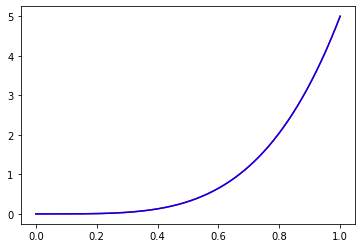

In [111]:
plot_function(p_prime, 0, 1, color = 'red')
plot_function(lambda x : p_prime_expression.evaluate(x = x), 0, 1, color = 'blue')
plt.show()

## Explain why the rules for taking deriatives mean the deriative is a linear transformation of this vector space

d(f(x) + g(x)) = d(f(x)) + d(g(x))
cd(f(x)) = d(cf(x))

## Find a formula for the deriative of a a quotient f(x) / g(x) 

f'(x)(g(x)^-1) + -f(x)((g(x))^-2)*g'(x)

## What is the deriative of sin(x) * cos(x) * ln(x)

cos(x) * cos(x) * ln(x) - sin(x) * sin(x) * ln(x) + sin(x) * cos(x) / x

In [112]:
cos = Function('cos')
ln = Function('ln')
sin = Function('sin')
X = Variable('x')

f_expression = Product(Apply(sin, X), Product(Apply(cos, X), Apply(ln, X)))

In [113]:
f_expression

Product(Apply(Function("sin"),Variable("x")),Product(Apply(Function("cos"),Variable("x")),Apply(Function("ln"),Variable("x"))))

In [115]:
f_expression.derivative(var = x)

Sum(Product(Product(Number(1),Apply(Function("cos"),Variable("x"))),Product(Apply(Function("cos"),Variable("x")),Apply(Function("ln"),Variable("x")))),Product(Apply(Function("sin"),Variable("x")),Sum(Product(Product(Number(1),Product(Number(-1),Apply(Function("sin"),Variable("x")))),Apply(Function("ln"),Variable("x"))),Product(Apply(Function("cos"),Variable("x")),Product(Number(1),Quotient(Number(1),Variable("x")))))))